<img src="images/BCG Gamma.jpg" width="200px" align="left">

<div class="alert alert-info">

<div style="font-size:30pt; line-height:30pt; font-weight:bold; text-align:center;">Data analysis template</div>
<div style="font-size:20pt; line-height:20pt; font-weight:bold; text-align:center;">Consulting</div>


<b>Created by  :</b> Willy LAO<br>
<b>*Last update :*</b> 20/01/2019 

</div>

<div style="font-size:25pt; line-height:15pt; font-weight:bold;">Table of contents</div>
<br>

    
1. [A first look at the data](#1)<br>
$\;\;\;$    1.1 [What is an Extra-Tree?](#sec1.1)<br>
$\;\;\;\;\;\;\;\;$ 1.2.1 [Split_a_node(S)](#sec1.1.1)<br>

## TOC:
* [First Bullet Header](#first-bullet)
* [Second Bullet Header](#second-bullet)

<div style="font-size:20pt; line-height:20pt; font-weight:bold;"> Import the useful librairies and functions 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# CUSTOM FUNCTION
############################################################################

# Function call: data_display_pandas(data)
# Purpose      : Returns the name of a variable in a string

# Inputs       : data       = list of dataframes
#                data_names = list of the names of the dataframes 
# Outputs      : Display a table with the head() and describe() of the data

############################################################################

def data_display_pandas(data, data_names):    
    
    import pandas as pd
    import ipywidgets as widgets
    from ipywidgets import interactive
    
    dict_display = {}
    for j in range(len(data)) :
        data_j     = data[j]
        dict_display.update({data_names[j]: data_j})

    def f(Data):
        return dict_display[Data]
    
    widgets.interact(f, Data=data_names)
    return f         

<a id='1'></a>
# A first look at the data  

In [7]:
# Import the data
df_train = pd.read_csv('../data/train.csv')

In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

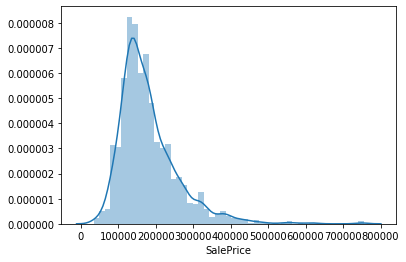

In [11]:

#histogram
sns.distplot(df_train['SalePrice']);